<a href="https://colab.research.google.com/github/akashb1504/Jee-Closing-Rank-Prediction/blob/main/JEE_Closing_Rank_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests pandas


In [ ]:
import requests
import pandas as pd
import time  # To add a delay between requests (avoid rate limits)

# API base URL (modify if needed)
base_url = "https://rankmatrix.iitr.ac.in/rankmatrix/api/rank/list/"

# Headers (mimic a browser request)
headers = {
    "User-Agent": "Mozilla/5.0",
    "Referer": "https://rankmatrix.iitr.ac.in/rank"
}

# Parameters for data extraction
years = range(2019, 2025)  # 2019 to 2024 (Python range excludes upper limit)
round_num = 1  # Round 1
type_list = "IIT"  # Modify if needed (IIT, NIT, IIIT, etc.)

# List to store all data
all_data = []

# Loop through years
for year in years:
    print(f"Extracting data for year: {year}")

    page = 1  # Start from page 1

    while True:
        # Construct API URL with dynamic year, round, and pagination
        api_url = f"{base_url}?type_list={type_list}&page={page}&search=&orderField=&ordering=&year={year}&round={round_num}"

        try:
            # Send GET request
            response = requests.get(api_url, headers=headers, timeout=10, verify=False)  # verify=False avoids SSL issue

            # Check if request is successful
            if response.status_code == 200:
                data = response.json()

                # Extract 'results' key (actual data)
                if "results" in data:
                    all_data.extend(data["results"])
                    print(f"Year {year} - Page {page} extracted successfully!")
                else:
                    print(f"No data found for Year {year}, Page {page}")
                    break  # Stop if no results

                # Check if there are more pages
                if "total_pages" in data and page < data["total_pages"]:
                    page += 1  # Move to next page
                    time.sleep(1)  # Avoid overwhelming the server
                else:
                    break  # No more pages, move to next year
            else:
                print(f"Failed to fetch data for Year {year}, Page {page}. Status: {response.status_code}")
                break  # Stop further requests if API fails

        except Exception as e:
            print(f"Error fetching data for Year {year}, Page {page}: {e}")
            break  # Stop further requests in case of error

# Convert collected data into a Pandas DataFrame
df = pd.DataFrame(all_data)

# Save to CSV
df.to_csv("jee_rank_matrix_2019_2024.csv", index=False)
print("Data extraction complete! Saved as 'jee_rank_matrix_2019_2024.csv'")


Extracting data for year: 2019
Year 2019 - Page 1 extracted successfully!
Year 2019 - Page 2 extracted successfully!
Year 2019 - Page 3 extracted successfully!
Year 2019 - Page 4 extracted successfully!
Year 2019 - Page 5 extracted successfully!
Year 2019 - Page 6 extracted successfully!
Year 2019 - Page 7 extracted successfully!
Year 2019 - Page 8 extracted successfully!
Year 2019 - Page 9 extracted successfully!
Year 2019 - Page 10 extracted successfully!
Year 2019 - Page 11 extracted successfully!
Year 2019 - Page 12 extracted successfully!
Year 2019 - Page 13 extracted successfully!
Year 2019 - Page 14 extracted successfully!
Year 2019 - Page 15 extracted successfully!
Year 2019 - Page 16 extracted successfully!
Year 2019 - Page 17 extracted successfully!
Year 2019 - Page 18 extracted successfully!
Year 2019 - Page 19 extracted successfully!
Year 2019 - Page 20 extracted successfully!
Year 2019 - Page 21 extracted successfully!
Year 2019 - Page 22 extracted successfully!
Year 2019 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mini project/jee_rank_matrix_2019_2024.csv")
df.head()

,id,institute_detail,category,seat_pool,quota,latest_year,branch_detail,year,opening_rank,closing_rank
0,68250,{'full_name': 'Indian Institute of Technology ...,General,Gender-Neutral,AI,2024,"{'full_name': 'Civil Engineering', 'code': '41...",2019,6546,7720
1,68251,{'full_name': 'Indian Institute of Technology ...,General,Female-only,AI,2024,"{'full_name': 'Civil Engineering', 'code': '41...",2019,11238,13803
2,68252,{'full_name': 'Indian Institute of Technology ...,GEN-EWS,Gender-Neutral,AI,2024,"{'full_name': 'Civil Engineering', 'code': '41...",2019,736,770
3,68253,{'full_name': 'Indian Institute of Technology ...,GEN-EWS,Female-only,AI,2024,"{'full_name': 'Civil Engineering', 'code': '41...",2019,1694,1694
4,68254,{'full_name': 'Indian Institute of Technology ...,OBC-NCL,Gender-Neutral,AI,2024,"{'full_name': 'Civil Engineering', 'code': '41...",2019,2078,2930


In [ ]:
df.shape

(15492, 10)

In [ ]:
df.columns

Index(['id', 'institute_detail', 'category', 'seat_pool', 'quota',
       'latest_year', 'branch_detail', 'year', 'opening_rank', 'closing_rank'],
      dtype='object')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15492 entries, 0 to 15491
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                15492 non-null  int64 
 1   institute_detail  15492 non-null  object
 2   category          15492 non-null  object
 3   seat_pool         15492 non-null  object
 4   quota             15492 non-null  object
 5   latest_year       15492 non-null  int64 
 6   branch_detail     15492 non-null  object
 7   year              15492 non-null  int64 
 8   opening_rank      15492 non-null  int64 
 9   closing_rank      15492 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.2+ MB
None


In [ ]:
df["year"].unique()

array([2019, 2020, 2021, 2022, 2023, 2024])

In [ ]:
df["latest_year"].unique()

array([2024])

In [ ]:
df["quota"].unique()

array(['AI'], dtype=object)

Quota = AI ; All India

In [ ]:
df["seat_pool"].unique()

array(['Gender-Neutral', 'Female-only'], dtype=object)

In [ ]:
df["category"].unique()

array(['General', 'GEN-EWS', 'OBC-NCL', 'SC', 'ST', 'General PwD',
       'OBC-NCL(PwD)', 'SC PwD', 'ST PwD', 'GEN-EWS(PwD)'], dtype=object)

In [ ]:
df["branch_detail"].unique()

array(["{'full_name': 'Civil Engineering', 'code': '4109', 'name': 'Civil Engineering (4 Years)', 'id': 53}",
       "{'full_name': 'Computer Science and Engineering', 'code': '4110', 'name': 'Computer Science and Engineering (4 Years)', 'id': 69}",
       "{'full_name': 'Electrical Engineering', 'code': '4111', 'name': 'Electrical Engineering (4 Years)', 'id': 88}",
       "{'full_name': 'Electronics and Communication Engineering', 'code': '4114', 'name': 'Electronics and Communication Engineering (4 Years)', 'id': 99}",
       "{'full_name': 'Mechanical Engineering', 'code': '4125', 'name': 'Mechanical Engineering (4 Years)', 'id': 184}",
       "{'full_name': 'Metallurgical and Materials Engineering', 'code': '4127', 'name': 'Metallurgical and Materials Engineering (4 Years)', 'id': 200}",
       "{'full_name': 'Computer Science and Engineering', 'code': '5216', 'name': 'Computer Science and Engineering (5 Years Dual Degree)', 'id': 70}",
       "{'full_name': 'Metallurgical and Mat

In [ ]:
df["institute_detail"].unique()

array(["{'full_name': 'Indian Institute of Technology Bhubaneswar', 'code': '101', 'name': 'Bhubhneshwar', 'id': 1, 'type': 'IIT'}",
       "{'full_name': 'Indian Institute of Technology Bombay', 'code': '102', 'name': 'Bombay', 'id': 2, 'type': 'IIT'}",
       "{'full_name': 'Indian Institute of Technology Mandi', 'code': '103', 'name': 'Mandi', 'id': 3, 'type': 'IIT'}",
       "{'full_name': 'Indian Institute of Technology Delhi', 'code': '104', 'name': 'Delhi', 'id': 4, 'type': 'IIT'}",
       "{'full_name': 'Indian Institute of Technology Indore', 'code': '105', 'name': 'Indore', 'id': 5, 'type': 'IIT'}",
       "{'full_name': 'Indian Institute of Technology Kharagpur', 'code': '106', 'name': 'Kharagpur', 'id': 6, 'type': 'IIT'}",
       "{'full_name': 'Indian Institute of Technology Hyderabad', 'code': '107', 'name': 'Hyderabad', 'id': 7, 'type': 'IIT'}",
       "{'full_name': 'Indian Institute of Technology Jodhpur', 'code': '108', 'name': 'Jodhpur', 'id': 8, 'type': 'IIT'}",
   

# Preprocessing

In [ ]:
print(df.isnull().sum())

id                  0
institute_detail    0
category            0
seat_pool           0
quota               0
latest_year         0
branch_detail       0
year                0
opening_rank        0
closing_rank        0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15492 entries, 0 to 15491
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                15492 non-null  int64 
 1   institute_detail  15492 non-null  object
 2   category          15492 non-null  object
 3   seat_pool         15492 non-null  object
 4   quota             15492 non-null  object
 5   latest_year       15492 non-null  int64 
 6   branch_detail     15492 non-null  object
 7   year              15492 non-null  int64 
 8   opening_rank      15492 non-null  int64 
 9   closing_rank      15492 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.2+ MB


In [ ]:
#dropping unwanted columns
df.drop(columns=["id", "latest_year"], inplace=True)

In [ ]:
df.shape

(15492, 8)

In [ ]:
import pandas as pd
import ast

# Function to extract 'full_name' from 'institute_detail'
def extract_institute_name(institute_str):
    try:
        institute_dict = ast.literal_eval(institute_str)  # Convert string to dictionary
        return institute_dict.get("full_name", "")  # Extract 'full_name'
    except:
        return None  # Handle errors

# Function to extract 'branch_name' from 'branch_detail'
def extract_branch_name(branch_str):
    try:
        branch_dict = ast.literal_eval(branch_str)  # Convert string to dictionary
        return branch_dict.get("name", "")  # Extract 'name'
    except:
        return None  # Handle errors

# Apply extraction functions
df["institute_name"] = df["institute_detail"].apply(extract_institute_name)
df["branch_name"] = df["branch_detail"].apply(extract_branch_name)

# Drop original dictionary-like columns
df.drop(columns=["institute_detail", "branch_detail"], inplace=True)

# Display first few rows to verify
print(df.head())



  category       seat_pool quota  year  opening_rank  closing_rank  \
0  General  Gender-Neutral    AI  2019          6546          7720   
1  General     Female-only    AI  2019         11238         13803   
2  GEN-EWS  Gender-Neutral    AI  2019           736           770   
3  GEN-EWS     Female-only    AI  2019          1694          1694   
4  OBC-NCL  Gender-Neutral    AI  2019          2078          2930   

                               institute_name                  branch_name  
0  Indian Institute of Technology Bhubaneswar  Civil Engineering (4 Years)  
1  Indian Institute of Technology Bhubaneswar  Civil Engineering (4 Years)  
2  Indian Institute of Technology Bhubaneswar  Civil Engineering (4 Years)  
3  Indian Institute of Technology Bhubaneswar  Civil Engineering (4 Years)  
4  Indian Institute of Technology Bhubaneswar  Civil Engineering (4 Years)  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15492 entries, 0 to 15491
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        15492 non-null  object
 1   seat_pool       15492 non-null  object
 2   quota           15492 non-null  object
 3   year            15492 non-null  int64 
 4   opening_rank    15492 non-null  int64 
 5   closing_rank    15492 non-null  int64 
 6   institute_name  15492 non-null  object
 7   branch_name     15492 non-null  object
dtypes: int64(3), object(5)
memory usage: 968.4+ KB


In [ ]:
print(df.describe())

               year  opening_rank  closing_rank
count  15492.000000  15492.000000  15492.000000
mean    2021.677963   2971.934482   3455.487671
std        1.694930   3755.649385   4186.111507
min     2019.000000      1.000000      1.000000
25%     2020.000000    627.000000    811.000000
50%     2022.000000   1605.500000   1923.000000
75%     2023.000000   3601.500000   4194.750000
max     2024.000000  27603.000000  29247.000000


In [ ]:
'''preprocessed_path = '/content/jee_preprocessed.csv'
df.to_csv(preprocessed_path, index=False)

print(f"✅ Preprocessed dataset saved at: {preprocessed_path}")'''

'preprocessed_path = \'/content/jee_preprocessed.csv\'\ndf.to_csv(preprocessed_path, index=False)\n\nprint(f"✅ Preprocessed dataset saved at: {preprocessed_path}")'

In [ ]:
# Finding min and max values for opening_rank and closing_rank
min_opening_rank = df["opening_rank"].min()
max_opening_rank = df["opening_rank"].max()

min_closing_rank = df["closing_rank"].min()
max_closing_rank = df["closing_rank"].max()

# Display the results
print(f"Minimum Opening Rank: {min_opening_rank}")
print(f"Maximum Opening Rank: {max_opening_rank}")
print(f"Minimum Closing Rank: {min_closing_rank}")
print(f"Maximum Closing Rank: {max_closing_rank}")


Minimum Opening Rank: 1
Maximum Opening Rank: 27603
Minimum Closing Rank: 1
Maximum Closing Rank: 29247


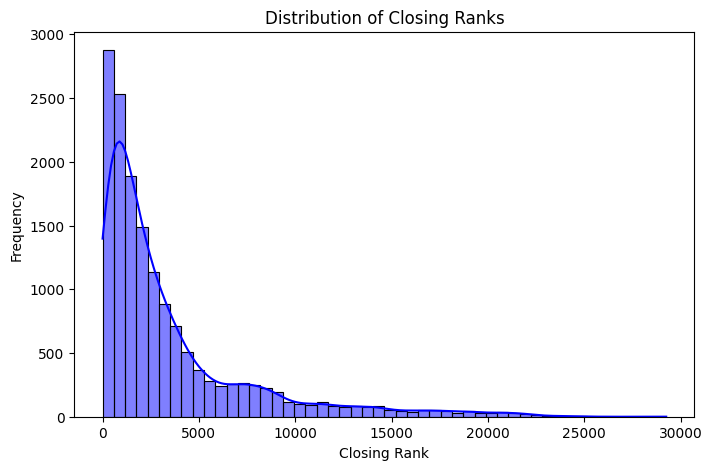

In [ ]:
# Distribution of closing ranks
plt.figure(figsize=(8, 5))
sns.histplot(df["closing_rank"], bins=50, kde=True, color="blue")
plt.title("Distribution of Closing Ranks")
plt.xlabel("Closing Rank")
plt.ylabel("Frequency")
plt.show()

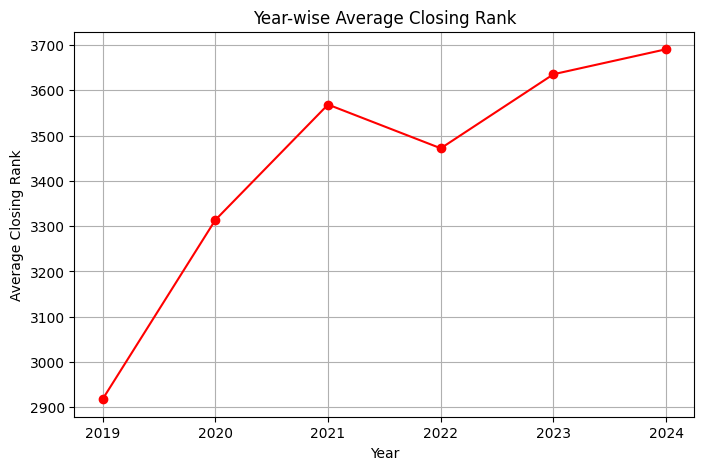

In [ ]:
# Year-wise trend of average closing rank (Line Chart)
yearly_avg = df.groupby("year")["closing_rank"].mean()

plt.figure(figsize=(8, 5))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color="red")
plt.title("Year-wise Average Closing Rank")
plt.xlabel("Year")
plt.ylabel("Average Closing Rank")
plt.grid(True)
plt.show()

<Figure size 800x500 with 0 Axes>

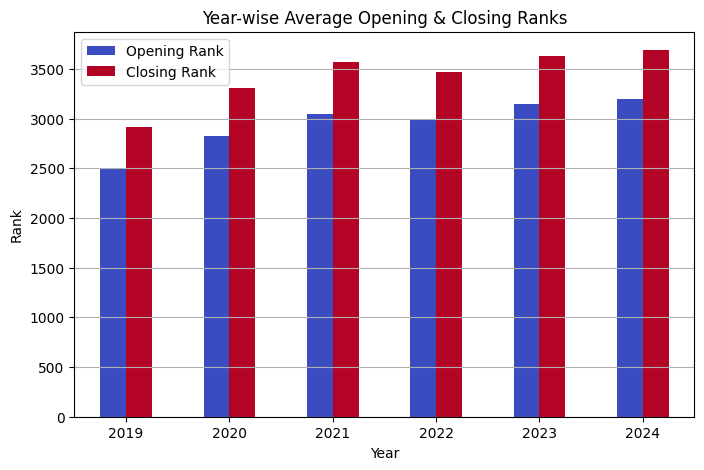

In [ ]:
df_grouped = df.groupby("year")[["opening_rank", "closing_rank"]].mean()
plt.figure(figsize=(8, 5))
df_grouped.plot(kind="bar", figsize=(8, 5), colormap="coolwarm")

plt.title("Year-wise Average Opening & Closing Ranks")
plt.xlabel("Year")
plt.ylabel("Rank")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.legend(["Opening Rank", "Closing Rank"])
plt.show()


<ipython-input-47-fbffe28a7b4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_avg.index, y=category_avg.values, palette="coolwarm")


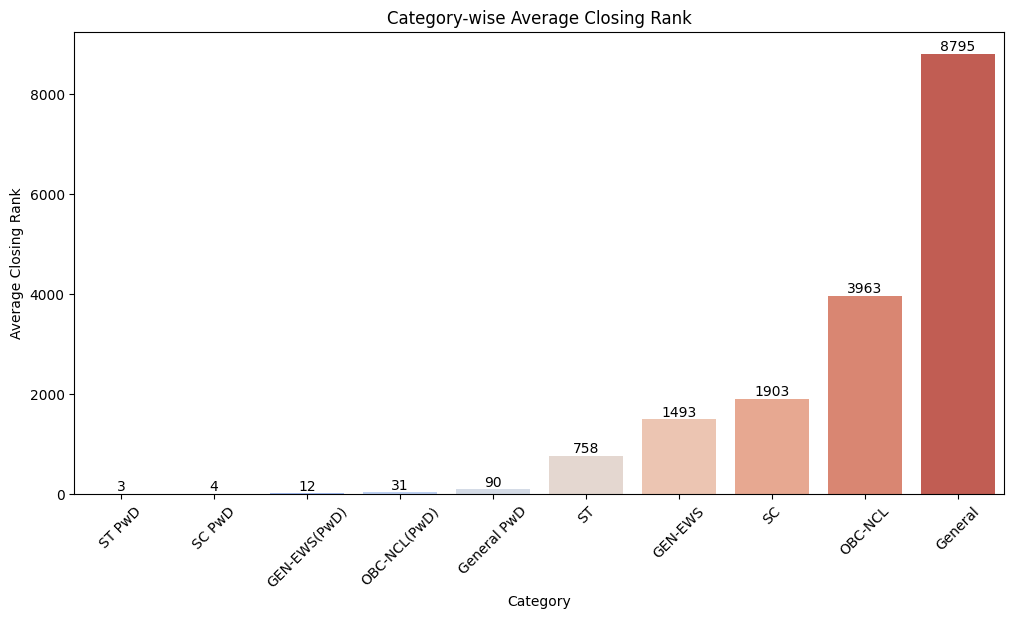

In [ ]:

# Compute category-wise average closing rank
category_avg = df.groupby("category")["closing_rank"].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=category_avg.index, y=category_avg.values, palette="coolwarm")

# Display values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Labels and title
plt.xticks(rotation=45)
plt.title("Category-wise Average Closing Rank")
plt.xlabel("Category")
plt.ylabel("Average Closing Rank")

# Show the plot
plt.show()


<ipython-input-48-16576888077b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=institute_avg.index, y=institute_avg.values, palette="viridis")


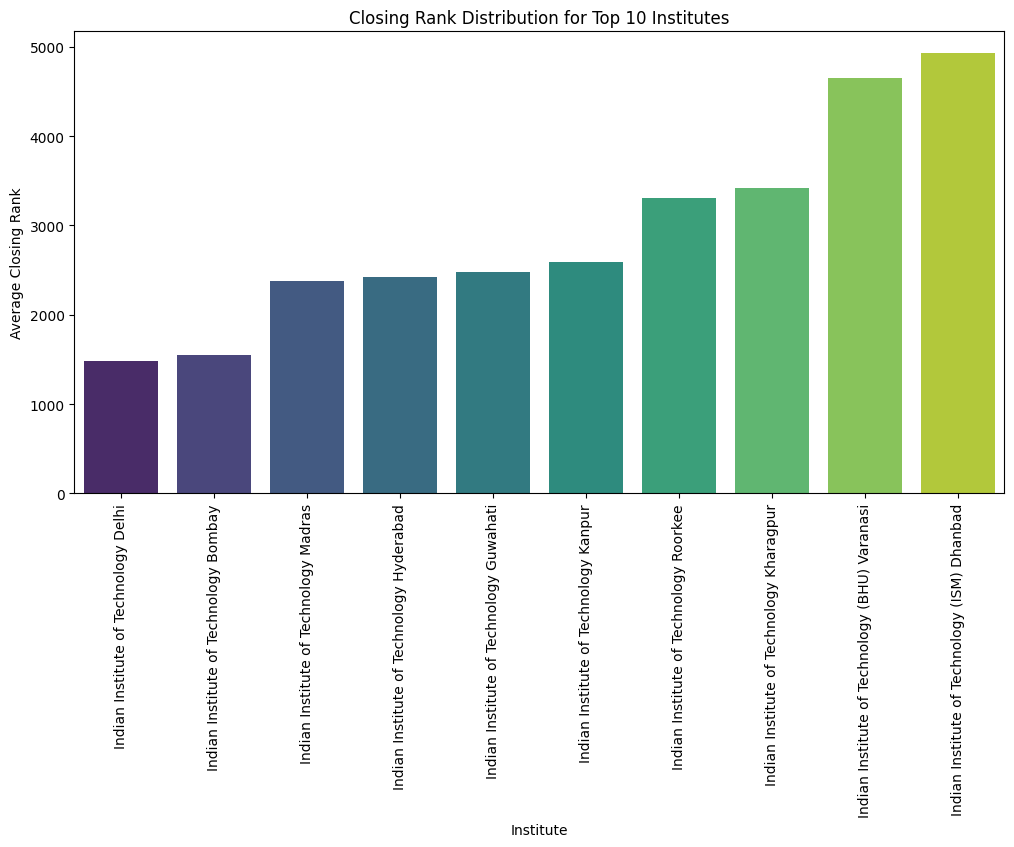

In [ ]:
# Institute-wise closing rank (Top 10 Institutes, Bar Chart)
top_10_institutes = df["institute_name"].value_counts().index[:10]
df_top_institutes = df[df["institute_name"].isin(top_10_institutes)]
institute_avg = df_top_institutes.groupby("institute_name")["closing_rank"].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=institute_avg.index, y=institute_avg.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Closing Rank Distribution for Top 10 Institutes")
plt.xlabel("Institute")
plt.ylabel("Average Closing Rank")
plt.show()

<ipython-input-49-af6c2e757258>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seat_pool_avg.index, y=seat_pool_avg.values, palette="Blues_r")


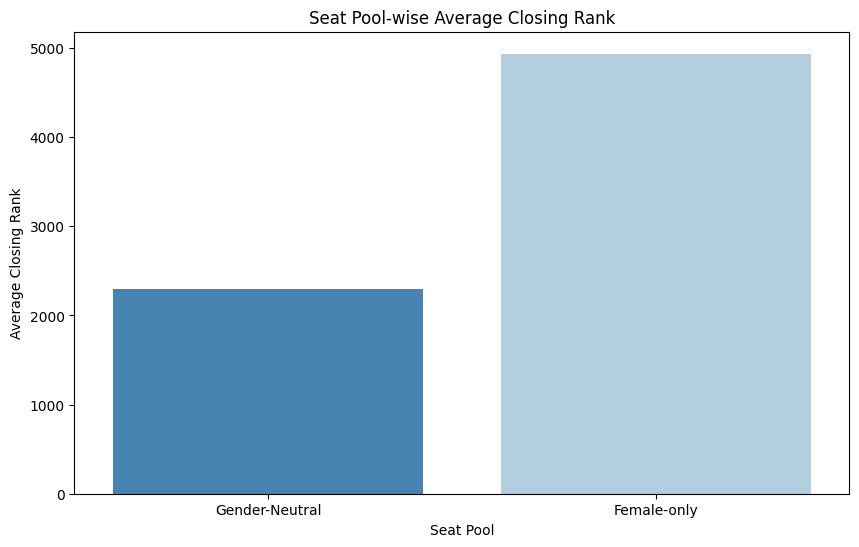

In [ ]:
### 2️⃣ Closing Rank vs. Seat Pool (Bar Chart) ###
seat_pool_avg = df.groupby("seat_pool")["closing_rank"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=seat_pool_avg.index, y=seat_pool_avg.values, palette="Blues_r")
plt.title("Seat Pool-wise Average Closing Rank")
plt.xlabel("Seat Pool")
plt.ylabel("Average Closing Rank")
plt.show()


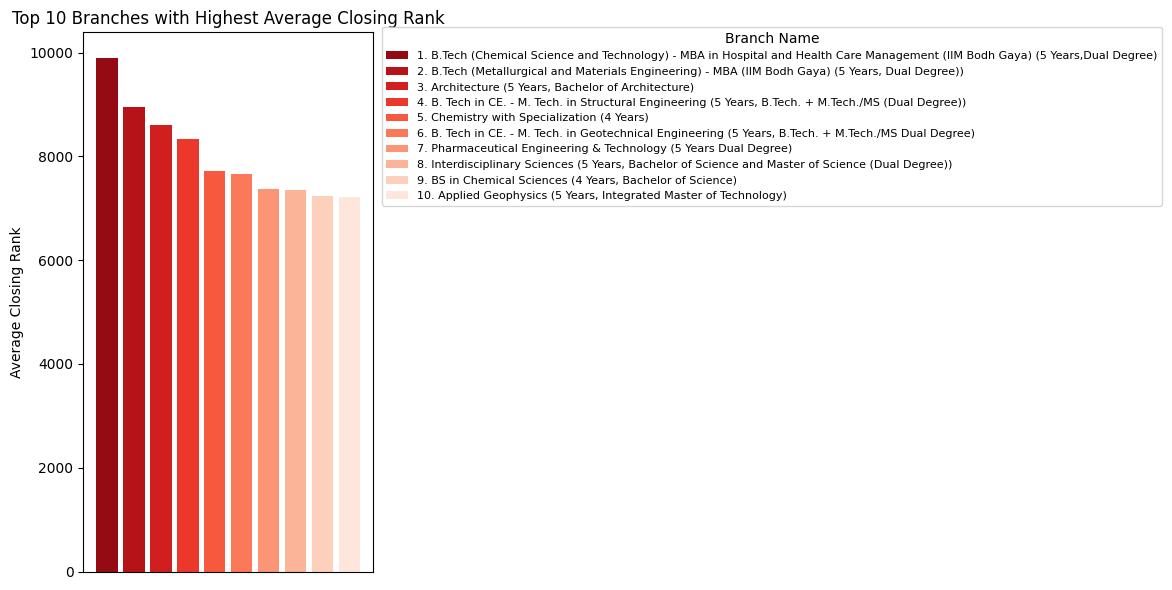

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
top_10_branches = df.groupby("branch_name")["closing_rank"].mean().sort_values(ascending=False).head(10)
branch_labels = list(top_10_branches.index)
ranks = top_10_branches.values
indices = range(len(branch_labels))

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(indices, ranks, color=sns.color_palette("Reds_r", len(branch_labels)))
ax.set_ylabel("Average Closing Rank")
ax.set_title("Top 10 Branches with Highest Average Closing Rank")
ax.set_xticks([])  # Hide x-axis labels

# Add legend outside the plot (top-right)
for i, label in enumerate(branch_labels):
    bars[i].set_label(f"{i+1}. {label}")
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1.02), title="Branch Name", fontsize=8, title_fontsize=10)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit legend outside
plt.show()


<ipython-input-102-324b7c4cbe53>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_competitive_institutes.index, y=top_10_competitive_institutes.values, palette="Greens_r")


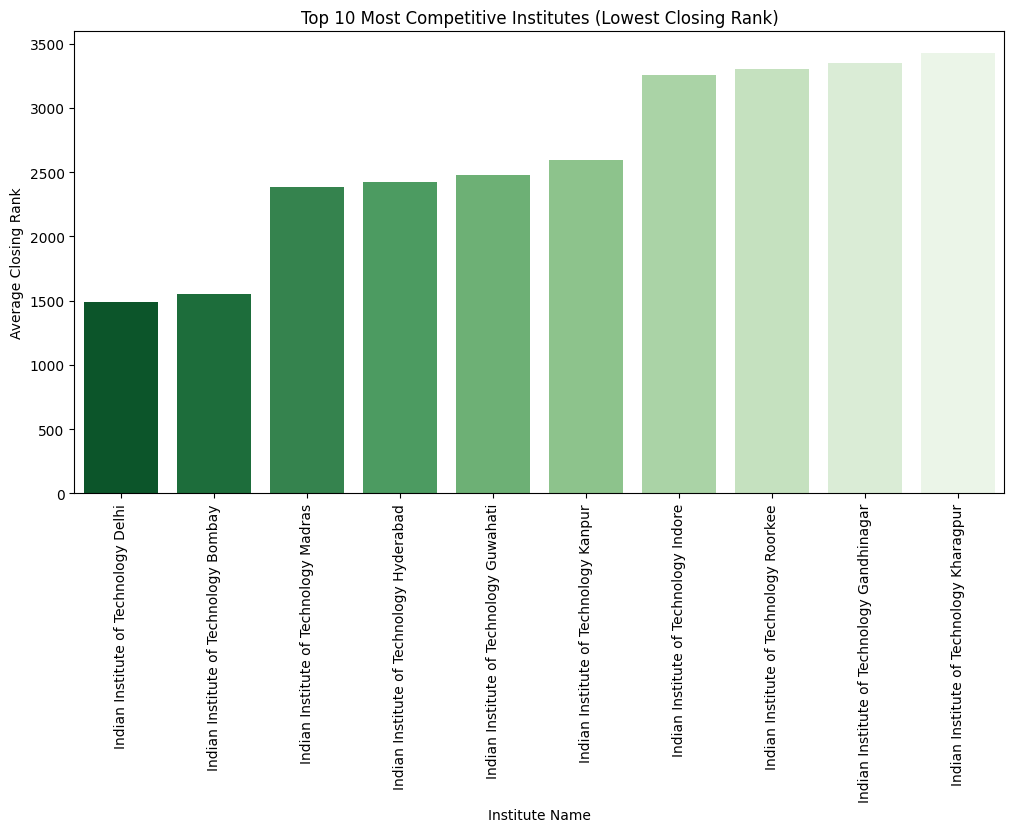

In [ ]:
### Top 10 Institutes with the Lowest Closing Ranks (Most Competitive) ###
top_10_competitive_institutes = df.groupby("institute_name")["closing_rank"].mean().sort_values().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_competitive_institutes.index, y=top_10_competitive_institutes.values, palette="Greens_r")
plt.xticks(rotation=90)
plt.title("Top 10 Most Competitive Institutes (Lowest Closing Rank)")
plt.xlabel("Institute Name")
plt.ylabel("Average Closing Rank")
plt.show()

# Model Training

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Selecting categorical features for encoding
categorical_features = ["category", "seat_pool", "quota", "institute_name", "branch_name"]

# Encoding categorical variables using Label Encoding
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use


# Linear Regression

In [ ]:
# Step 1: Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

# Step 2: Load data (assuming 'df' is your full dataset)

# Step 3: Prepare features and target
features = [col for col in df.columns if col != 'closing_rank']
target = 'closing_rank'

X = df[features]
y = df[target]

# Step 4: 80/20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 6: Predict on Test Set
y_pred = lr_model.predict(X_test)

# Step 7: Evaluate Model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print("Linear Regression Model:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Linear Regression Model:
R² Score: 0.9760
Mean Absolute Error (MAE): 403.93


## Random Forest

In [ ]:
# Step 1: Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 2: Prepare features and target
features = [col for col in df.columns if col != 'closing_rank']
target = 'closing_rank'

X = df[features]
y = df[target]

# Step 3: 80/20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Predict on Test Set
y_pred_rf = rf_model.predict(X_test)

# Step 6: Evaluate Performance
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print(f"R² Score: {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")


Random Forest Model Performance:
R² Score: 0.9838
Mean Absolute Error (MAE): 263.54


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pandas as pd

# Assuming df is your preprocessed dataframe
train_data = df[df["year"] < 2024]
test_data = df[df["year"] == 2024]

features = [col for col in df.columns if col != "closing_rank"]
target = "closing_rank"

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate Performance
r2 = r2_score(y_test, y_pred)

# Display Results
print(f"Model Performance on 2024 Data:")
print(f"R2 Score: {r2:.4f}")

# Compare Actual vs Predicted (First 10 rows)
comparison_df = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print("\nFirst 10 Predictions vs Actual Closing Ranks:")
print(comparison_df.head(20))


Model Performance on 2024 Data:
R2 Score: 0.9798

First 10 Predictions vs Actual Closing Ranks:
    Actual  Predicted
0    13018   10807.85
1    20788   19596.70
2     1975    1867.21
3     3308    3145.79
4     4796    4103.31
5     8530    7652.94
6     2485    2024.82
7     4172    4023.82
8      867     724.23
9     1626    1521.21
10    3404    4084.96
11    6717    5958.10
12     197     213.89
13     415     481.02
14    1025    1380.36
15    1220    1112.42
16    2661    2756.34
17      31      38.48
18     596     651.28
19    1313    1453.34


# XGBoost

In [ ]:
# Step 1: Install XGBoost if not installed (Uncomment if needed)
# !pip install xgboost

# Step 2: Import libraries
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 3: Prepare features and target
features = [col for col in df.columns if col != 'closing_rank']
target = 'closing_rank'

X = df[features]
y = df[target]

# Step 4: 80/20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 6: Predict on Test Set
y_pred_xgb = xgb_model.predict(X_test)

# Step 7: Evaluate Performance
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost Model Performance:")
print(f"R² Score: {r2_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")



XGBoost Model Performance:
R² Score: 0.9875
Mean Absolute Error (MAE): 240.42


In [ ]:
# Step 1: Import libraries
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# Step 2: Prepare Train and Test Data
train_data = df[df['year'] < 2024]  # 2019 to 2023
test_data = df[df['year'] == 2024]  # 2024

features = [col for col in df.columns if col != 'closing_rank']
target = 'closing_rank'

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Step 3: Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 4: Predict on 2024 Data
y_pred_xgb_2024 = xgb_model.predict(X_test)

# Step 5: Evaluate Performance
r2_xgb_2024 = r2_score(y_test, y_pred_xgb_2024)
mae_xgb_2024 = mean_absolute_error(y_test, y_pred_xgb_2024)

print("XGBoost Model Performance on 2024 Data:")
print(f"R² Score: {r2_xgb_2024:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb_2024:.2f}")

# (Optional) View Actual vs Predicted for first few rows
comparison_df = pd.DataFrame({
    'Actual Closing Rank': y_test.values,
    'Predicted Closing Rank': y_pred_xgb_2024
})

print("\nFirst 10 Predictions vs Actual Closing Ranks:")
print(comparison_df.head(10))


XGBoost Model Performance on 2024 Data:
R² Score: 0.9840
Mean Absolute Error (MAE): 271.20

First 10 Predictions vs Actual Closing Ranks:
   Actual Closing Rank  Predicted Closing Rank
0                13018            11529.366211
1                20788            19215.146484
2                 1975             1939.739502
3                 3308             3096.784912
4                 4796             4265.314941
5                 8530             7880.634277
6                 2485             2069.682129
7                 4172             4101.645508
8                  867              755.011902
9                 1626             1588.223022


## 2024 ACTUAL VS PREDICTED

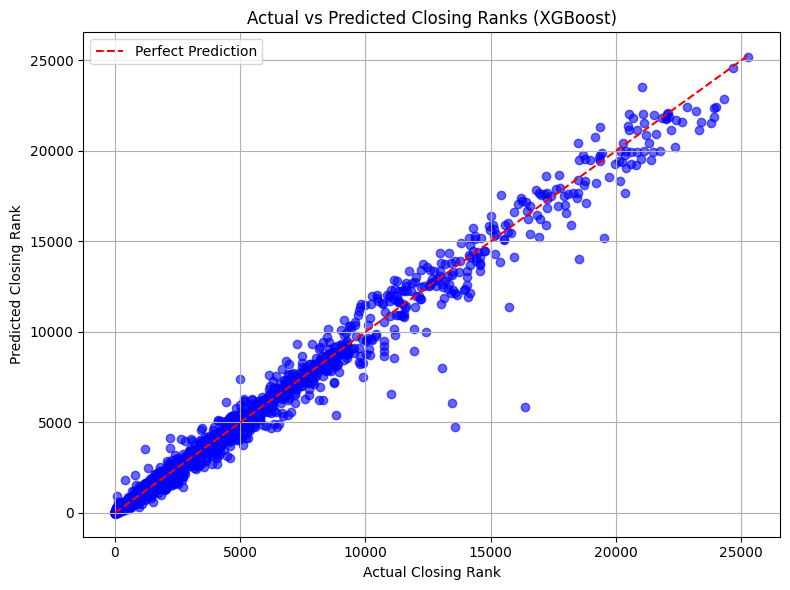

In [ ]:
import matplotlib.pyplot as plt

# Scatter Plot for Actual vs Predicted Closing Ranks
plt.figure(figsize=(8,6))
plt.scatter(comparison_df['Actual Closing Rank'], comparison_df['Predicted Closing Rank'], color='blue', alpha=0.6)

# Plot a reference line (perfect prediction line)
plt.plot([comparison_df['Actual Closing Rank'].min(), comparison_df['Actual Closing Rank'].max()],
         [comparison_df['Actual Closing Rank'].min(), comparison_df['Actual Closing Rank'].max()],
         color='red', linestyle='--', label='Perfect Prediction')

# Labels and Title
plt.xlabel('Actual Closing Rank')
plt.ylabel('Predicted Closing Rank')
plt.title('Actual vs Predicted Closing Ranks (XGBoost)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Step 1: Install LightGBM if not already installed
# !pip install lightgbm

# Step 2: Import libraries
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 3: Prepare features and target
features = [col for col in df.columns if col != 'closing_rank']
target = 'closing_rank'

X = df[features]
y = df[target]

# Step 4: 80/20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train LightGBM Regressor
lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Step 6: Predict on Test Set
y_pred_lgb = lgb_model.predict(X_test)

# Step 7: Evaluate Model
r2_lgb = r2_score(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)

print("LightGBM Model Performance:")
print(f"R² Score: {r2_lgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lgb:.2f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 460
[LightGBM] [Info] Number of data points in the train set: 12393, number of used features: 6
[LightGBM] [Info] Start training from score 3464.986283
LightGBM Model Performance:
R² Score: 0.9878
Mean Absolute Error (MAE): 240.88


# Deep Learning


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Step 2: Prepare features and target
features = [col for col in df.columns if col != 'closing_rank']
target = 'closing_rank'

X = df[features]
y = df[target]

# Step 3: 80/20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build MLP Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (predict closing rank)
])

# Step 5: Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 6: Define EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 7: Train Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Step 8: Predict on Test Set
y_pred_mlp = model.predict(X_test).flatten()

# Step 9: Evaluate Model
r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

print("\nMLP Model Performance:")
print(f"R² Score: {r2_mlp:.4f}")
print(f"Mean Absolute Error (MAE): {mae_mlp:.2f}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 7405138.5000 - mae: 1348.2081 - val_loss: 650634.2500 - val_mae: 428.7227
Epoch 2/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1086154.0000 - mae: 583.1105 - val_loss: 835810.8750 - val_mae: 510.7076
Epoch 3/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1011918.6875 - mae: 556.9210 - val_loss: 1075822.5000 - val_mae: 568.6427
Epoch 4/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 933263.0000 - mae: 551.0537 - val_loss: 921863.1250 - val_mae: 549.6525
Epoch 5/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 853679.0625 - mae: 526.5411 - val_loss: 835178.8750 - val_mae: 479.4430
Epoch 6/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 955599.1875 - mae: 546.2816 - val_loss: 1014069.8750 - val_mae: 561.8760
Epoch 7/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 854975.6250 - mae: 529.9901 - val_loss: 817381.8125 - val_mae: 486.7603
Epoch 8/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 839152.7500 - 

# Feature Selection

In [ ]:
importances = model.feature_importances_
feature_names = X_train.columns


feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 20 features
print(feature_importance_df.head(20))


          Feature  Importance
0    opening_rank    0.977285
1        category    0.009734
2     branch_name    0.006615
3  institute_name    0.003317
4            year    0.002132
5       seat_pool    0.000917
6           quota    0.000000


In [ ]:
top_features = feature_importance_df['Feature'].head(6).tolist()

print("Selected Features:", top_features)


Selected Features: ['opening_rank', 'category', 'branch_name', 'institute_name', 'year', 'seat_pool']


In [ ]:
# Create new train and test sets with only selected features
X_train_selected = train_data[top_features]
X_test_selected = test_data[top_features]

# Retrain the model
model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
model_selected.fit(X_train_selected, y_train)

# Predict
y_pred_selected = model_selected.predict(X_test_selected)

# Evaluate
r2_selected = r2_score(y_test, y_pred_selected)

print(f"Model Performance after Feature Selection:")
print(f"R2 Score: {r2_selected:.4f}")


Model Performance after Feature Selection:
R2 Score: 0.9801


In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Separate features and target
X = train_data.drop(columns=['closing_rank'])
y = train_data['closing_rank']

# Calculate Mutual Information scores
mi_scores = mutual_info_regression(X, y)

# Create DataFrame for scores
mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

# Display top features
print("\nTop Features based on Mutual Information Score:")
print(mi_scores_df)

# Select top 15 features
top_mi_features = mi_scores_df['Feature'].head(15).tolist()
print("\nSelected Top 15 Features:", top_mi_features)



Top Features based on Mutual Information Score:
          Feature  MI_Score
4    opening_rank  2.772676
0        category  0.605384
6     branch_name  0.257526
5  institute_name  0.081143
1       seat_pool  0.077727
2           quota  0.001860
3            year  0.000000

Selected Top 15 Features: ['opening_rank', 'category', 'branch_name', 'institute_name', 'seat_pool', 'quota', 'year']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pandas as pd

# 1. Prepare data
features = [col for col in df.columns if col != "closing_rank"]
target = "closing_rank"

X_train = train_data[features].copy()
y_train = train_data[target]

X_test = test_data[features].copy()
y_test = test_data[target]

# 2. Encode non-numeric columns
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # if string
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])  # Use same encoder for test data

# 3. Mutual Information Feature Selection
mi_scores = mutual_info_regression(X_train, y_train)

mi_scores_df = pd.DataFrame({
    'Feature': X_train.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

# Select Top 4 features
top_4_features = mi_scores_df['Feature'].head(5).tolist()

print("\nTop 4 Selected Features based on Mutual Information:")
print(top_4_features)

# 4. Train Random Forest using only Top 4 Features
X_train_top4 = X_train[top_4_features]
X_test_top4 = X_test[top_4_features]

model_top4 = RandomForestRegressor(n_estimators=100, random_state=42)
model_top4.fit(X_train_top4, y_train)

y_pred_top4 = model_top4.predict(X_test_top4)

# 5. Evaluate Performance
r2_top4 = r2_score(y_test, y_pred_top4)

print("\nModel Performance using Top 4 MI Features:")
print(f"R2 Score: {r2_top4:.4f}")



Top 4 Selected Features based on Mutual Information:
['opening_rank', 'category', 'branch_name', 'institute_name', 'seat_pool']

Model Performance using Top 4 MI Features:
R2 Score: 0.9796


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15492 entries, 0 to 15491
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   category        15492 non-null  int64
 1   seat_pool       15492 non-null  int64
 2   quota           15492 non-null  int64
 3   year            15492 non-null  int64
 4   opening_rank    15492 non-null  int64
 5   closing_rank    15492 non-null  int64
 6   institute_name  15492 non-null  int64
 7   branch_name     15492 non-null  int64
dtypes: int64(8)
memory usage: 968.4 KB


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply RFE
rfe = RFE(estimator=rf_model, n_features_to_select=4)  # select top 4 features
rfe.fit(X_train, y_train)

# Selected Features
selected_features_rfe = X_train.columns[rfe.support_].tolist()

print("\nTop Features selected by RFE:")
print(selected_features_rfe)

# Train model on selected features
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]

rf_model_rfe = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_rfe.fit(X_train_rfe, y_train)

y_pred_rfe = rf_model_rfe.predict(X_test_rfe)

# Evaluate
r2_rfe = r2_score(y_test, y_pred_rfe)
print(f"\nR2 Score using RFE Selected Features: {r2_rfe:.4f}")



Top Features selected by RFE:
['category', 'opening_rank', 'institute_name', 'branch_name']

R2 Score using RFE Selected Features: 0.9796


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 1. Build MLP Model
mlp_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output (closing rank)
])

# 2. Compile Model
mlp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 3. Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 4. Train Model
history = mlp_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# 5. Evaluate Model
loss, mae = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"\nMLP Test MAE: {mae:.4f}")

# 6. Predict and calculate R2 Score
y_pred_mlp = mlp_model.predict(X_test).flatten()
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP Accuracy (R² Score): {r2_mlp:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3711296.5000 - mae: 1054.2971 - val_loss: 993953.3125 - val_mae: 489.7011
Epoch 2/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 880793.6875 - mae: 557.3851 - val_loss: 958541.9375 - val_mae: 476.2075
Epoch 3/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 836713.1250 - mae: 541.9420 - val_loss: 2203077.7500 - val_mae: 803.3112
Epoch 4/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 839270.3750 - mae: 538.4040 - val_loss: 1016674.8750 - val_mae: 495.3765
Epoch 5/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 924018.9375 - mae: 543.1364 - val_loss: 2124434.0000 - val_mae: 792.0458
Epoch 6/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 789894.4375 - mae: 528.2076 - val_loss: 1403637.6250 - val_mae: 607.6021
Epoch 7/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 852436.3750 - mae: 529.2930 - val_loss: 1636855.2500 - val_mae: 695.7496
Epoch 8/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7